### Introduction
This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

### Questions this project aims to answer
- what park has the most category of species?
- What is the distribution of conservation_status for animals?
- Are certain types of species threatened (likely to be endangered)?
- What parks are not entering conservation status data regarding species?
- Which Park observes more endangered species?
- Which species were spotted the most at each park?
- What species are of concern to all parks?

### Meta Data

Data is from Codecademy

Note: The data for this project is *inspired* by real data, but is mostly fictional.

**species_info.csv:**

category - class of animal

scientific_name - the scientific name of each species

common_name - the common names of each species

conservation_status - each species’ current conservation status

**observations.csv:**

scientific_name - the scientific name of each species

park_name - Park where species were found

observations - the number of times each species was observed at park

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp = pd.read_csv('species_info.csv')
sp.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
ob =pd.read_csv('observations.csv')
ob.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
sp.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [5]:
ob.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [6]:
sp.isnull().sum()/len(sp) * 100

category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64

In [7]:
ob.isnull().sum()/len(ob) * 100

scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64

In [8]:
df = pd.merge(sp,ob, on='scientific_name', how='outer')
df

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128
...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Bryce National Park,111


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  880 non-null    object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [10]:
df.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'In Recovery',
       'Threatened'], dtype=object)

In [11]:
print(f"na values:{df.conservation_status.isna().sum()}")

print(df.conservation_status.value_counts())

na values:24752
conservation_status
Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: count, dtype: int64


nan:  24752 species are not of concern

In [12]:
df.isnull().sum()

category                   0
scientific_name            0
common_names               0
conservation_status    24752
park_name                  0
observations               0
dtype: int64

### Data cleaning

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [13]:
df.fillna('No Intervention', inplace=True)
df.conservation_status.value_counts()

conservation_status
No Intervention       24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64

### Analysis

#### what park has the most category of species?

In [14]:
df.describe(include='all')

,category,scientific_name,common_names,conservation_status,park_name,observations
count,25632,25632,25632,25632,25632,25632.000000
unique,7,5541,5504,5,4,NaN
top,Vascular Plant,Castor canadensis,Dicranum Moss,No Intervention,Bryce National Park,NaN
freq,19560,36,28,24752,6408,NaN
mean,NaN,NaN,NaN,NaN,NaN,142.214693
std,NaN,NaN,NaN,NaN,NaN,69.912475
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,86.000000
50%,NaN,NaN,NaN,NaN,NaN,124.000000
75%,NaN,NaN,NaN,NaN,NaN,195.000000


In [15]:
cate_park=df.groupby('park_name').agg({'category': 'count'})
cate_park.reset_index()

,park_name,category
0,Bryce National Park,6408
1,Great Smoky Mountains National Park,6408
2,Yellowstone National Park,6408
3,Yosemite National Park,6408


All parks have equal amount of category of species

#### What is the distribution of conservation_status for animals?

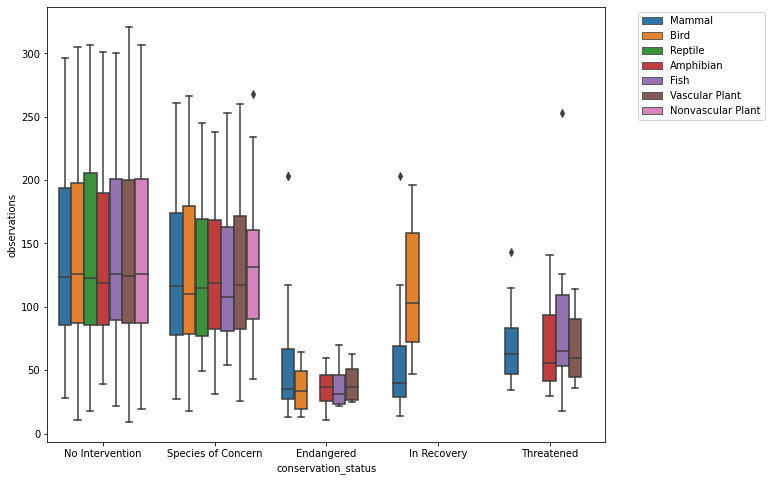

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'conservation_status', y='observations', hue='category', data=df)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#### Are certain types of species threatened (likely to be endangered)?
From the distribution above, the mammals, amphibians, fishes and vascular plants are more likely to be endangered.

#### Which Endangered Specie is the least spotted in all parks?

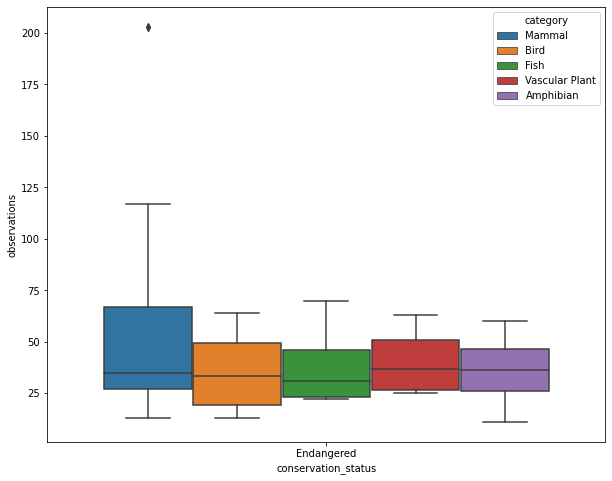

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'conservation_status', y='observations', hue='category', data=df[df.conservation_status == 'Endangered'])
plt.show()

The fishes and the mammals seem to be the least spotted species in parks, while Vascular plant and Amphibians are the most observed.

#### What parks are not entering conservation status data regarding species?
All Parks contribute to missing data in conservation status column

In [18]:
df[df.conservation_status.isnull()].park_name.unique()

array([], dtype=object)

In [19]:
df.park_name.unique()

array(['Bryce National Park', 'Yellowstone National Park',
       'Great Smoky Mountains National Park', 'Yosemite National Park'],
      dtype=object)

#### Which Park observes more endangered species?

In [20]:
ordered_df = df[df.conservation_status == 'Endangered'].sort_values(by='observations', ascending=False)

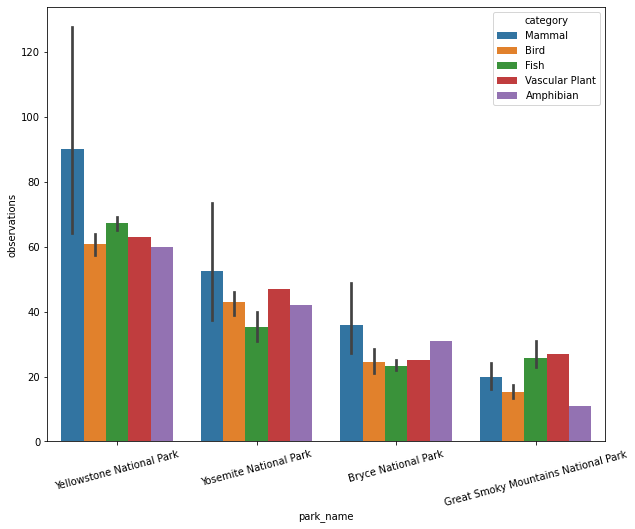

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'park_name', y='observations', hue='category', data=df[df.conservation_status == 'Endangered'], order=ordered_df['park_name'].unique())
plt.xticks(rotation=15)
plt.show()

The Yellowstone National Park observes more endangered species compared to the other parks.

#### Which species were spotted the most at each park?

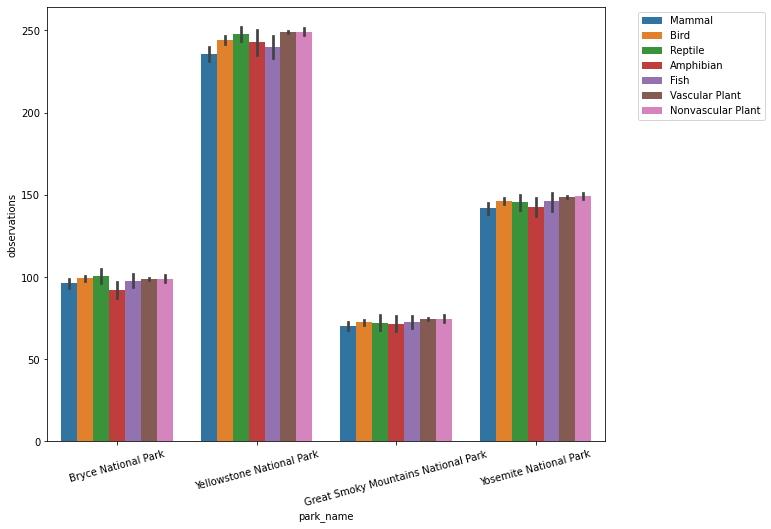

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'park_name', y='observations', hue='category', data=df)
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()

 - In the Bryce National Park, Reptiles are spotted the most

 - In the Yellowstone National Park, Vascular and Nonvascular plants are spotted the most

-  In the Great Smoky Mountains National Park, Vascular and Nonvascular plants are spotted the most

-  In Yosemite National Park, Vascular and Nonvascular plants are spotted the most

#### What species are of concern to all parks?

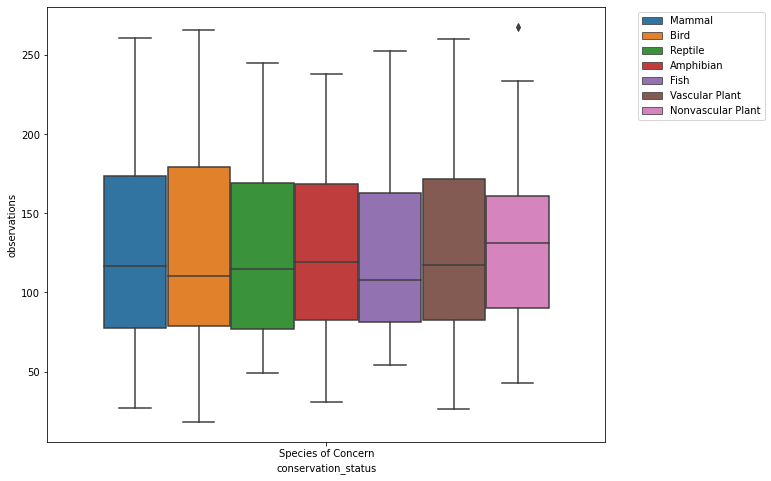

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'conservation_status', y='observations', hue='category', data=df[df.conservation_status == 'Species of Concern'])
# move legend ou the plot
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

All species are of concern, with nonvascular plant typically spotted more compared to the other categories in all parks